# Business Case of Porsche and Volkswagen

### Analyze the data leading up to the Volkswagen buyout of Porsche

### We analyze the Diesel gate scandal as well:
The Dieselgate scandal came to light in 2015, when it turned out that Volkswagen had equipped millions of diesel cars with software that made them appear cleaner during emissions tests. Drivers argued that they had suffered damage because their cars were more polluting than stated by the company

In [1]:
## Importing the Packages
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest 
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()
%matplotlib inline

In [2]:
# Importing the data

raw_data = yfinance.download(tickers="VOW3.DE,PAH3.DE,BMW.DE",interval="1d",
                             group_by="ticker",auto_adjust = True,treads = True)


#All in one " "

[*********************100%***********************]  3 of 3 completed


In [3]:
df = raw_data.copy()

In [4]:
df.head()

# We seem to have many NAN values 

PAH3.DE                           BMW.DE                        \
              Open High Low Close Volume       Open       High        Low   
Date                                                                        
1996-11-08     NaN  NaN NaN   NaN    NaN  10.063324  10.063324  10.041772   
1996-11-11     NaN  NaN NaN   NaN    NaN  10.052274  10.057801   9.992591   
1996-11-12     NaN  NaN NaN   NaN    NaN  10.036247  10.128536   9.998116   
1996-11-13     NaN  NaN NaN   NaN    NaN  10.137376  10.137376  10.052272   
1996-11-14     NaN  NaN NaN   NaN    NaN  10.060563  10.106983  10.020221   

                                 VOW3.DE                        
                Close     Volume    Open High Low Close Volume  
Date                                                            
1996-11-08  10.041772   767000.0     NaN  NaN NaN   NaN    NaN  
1996-11-11  10.014695   260000.0     NaN  NaN NaN   NaN    NaN  
1996-11-12  10.090405  1066000.0     NaN  NaN NaN   NaN    NaN  
1996-11-13  10.074376   793000.0     NaN  NaN NaN   NaN    NaN  
1996-11-14  10.106983   351000.0     NaN  NaN NaN   NaN    NaN

## Defining Key Dates

In [5]:
# Starting Date
start_date = "2009-04-05"
# March 5th
# First Official Announcement - 49.9%
announc_1 = "2009-12-09"
#December 9th

# Second Official Announcement - 51.1% - Full ownership
announc_2 = "2012-07-05"
#July 5th

#Ending Date
end_date = "2014-02-01"
#Feb 2nd

# Dieselgate - Scandal
d_gate = "2015-09-20"
#Sept 20th

## Pre-processing the Data

In [6]:
df.columns

MultiIndex([('PAH3.DE',   'Open'),
            ('PAH3.DE',   'High'),
            ('PAH3.DE',    'Low'),
            ('PAH3.DE',  'Close'),
            ('PAH3.DE', 'Volume'),
            ( 'BMW.DE',   'Open'),
            ( 'BMW.DE',   'High'),
            ( 'BMW.DE',    'Low'),
            ( 'BMW.DE',  'Close'),
            ( 'BMW.DE', 'Volume'),
            ('VOW3.DE',   'Open'),
            ('VOW3.DE',   'High'),
            ('VOW3.DE',    'Low'),
            ('VOW3.DE',  'Close'),
            ('VOW3.DE', 'Volume')],
           )

In [7]:
# Extracting Closing Prices
df["vol"] = df["VOW3.DE"].Close  #closing prices
df["por"] = df["PAH3.DE"].Close
df["bmw"] =df["BMW.DE"].Close


# Creating Returns

df["vol_returns"] = df["vol"].pct_change(1)*100
df["por_returns"] = df["por"].pct_change(1)*100
df["bmw_returns"] = df["bmw"].pct_change(1)*100

# Creating Squared Returns
df["vol_sq"] = df.vol_returns*df.vol_returns
df["pos_sq"] = df.por_returns*df.por_returns
df["bmw_sq"] = df.bmw_returns*df.bmw_returns

# Extracting Volume - Number of purchases in sales each day
df["vol_vol"] = df["VOW3.DE"].Volume  
df["por_vol"] = df["PAH3.DE"].Volume
df["bmw_vol"] =df["BMW.DE"].Volume

df.columns


MultiIndex([(    'PAH3.DE',   'Open'),
            (    'PAH3.DE',   'High'),
            (    'PAH3.DE',    'Low'),
            (    'PAH3.DE',  'Close'),
            (    'PAH3.DE', 'Volume'),
            (     'BMW.DE',   'Open'),
            (     'BMW.DE',   'High'),
            (     'BMW.DE',    'Low'),
            (     'BMW.DE',  'Close'),
            (     'BMW.DE', 'Volume'),
            (    'VOW3.DE',   'Open'),
            (    'VOW3.DE',   'High'),
            (    'VOW3.DE',    'Low'),
            (    'VOW3.DE',  'Close'),
            (    'VOW3.DE', 'Volume'),
            (        'vol',       ''),
            (        'por',       ''),
            (        'bmw',       ''),
            ('vol_returns',       ''),
            ('por_returns',       ''),
            ('bmw_returns',       ''),
            (     'vol_sq',       ''),
            (     'pos_sq',       ''),
            (     'bmw_sq',       ''),
            (    'vol_vol',       ''),
            (    'por_vol

In [8]:
# Assigning the Frequency and Filling NA Values
df = df.asfreq("b")
df = df.fillna(method="bfill")


# Bbill is backward filling , i.w considering data of previous days

In [9]:
# Removing Surplus Data
df.drop(columns=["VOW3.DE","BMW.DE","PAH3.DE"],axis=1,inplace=True)

In [10]:
df.columns

MultiIndex([(        'vol', ''),
            (        'por', ''),
            (        'bmw', ''),
            ('vol_returns', ''),
            ('por_returns', ''),
            ('bmw_returns', ''),
            (     'vol_sq', ''),
            (     'pos_sq', ''),
            (     'bmw_sq', ''),
            (    'vol_vol', ''),
            (    'por_vol', ''),
            (    'bmw_vol', '')],
           )

## Plotting the Prices

Text(0.5, 1.0, 'Plots from 2009-04-05 - 2014-02-01')

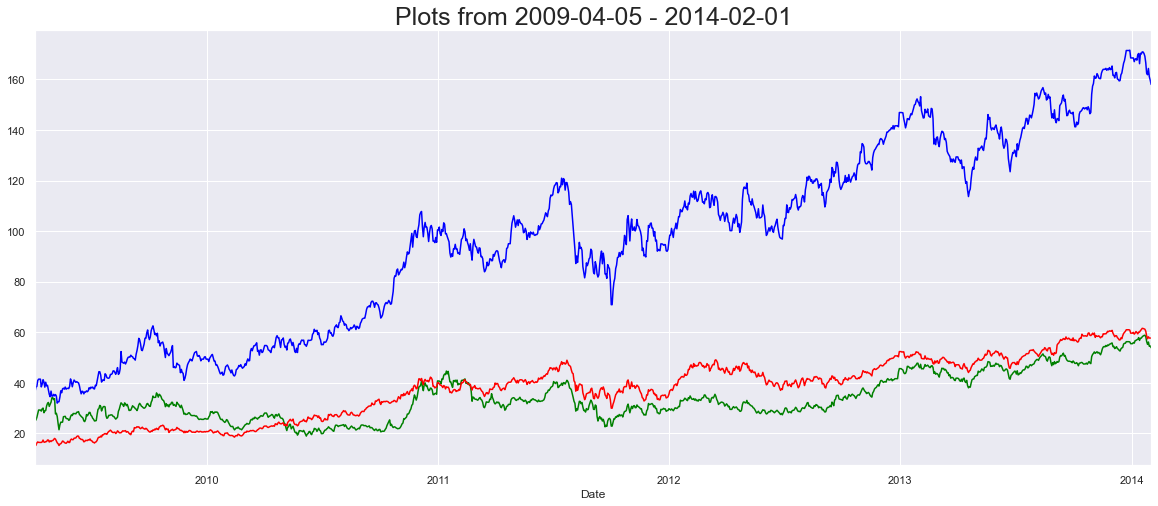

In [37]:
df["vol"][start_date:end_date].plot(figsize = (20,8), color = "blue")
df["por"][start_date:end_date].plot(color = "green")
df["bmw"][start_date:end_date].plot(color = "red")
plt.title("Plots from 2009-04-05 - 2014-02-01",size = 25)


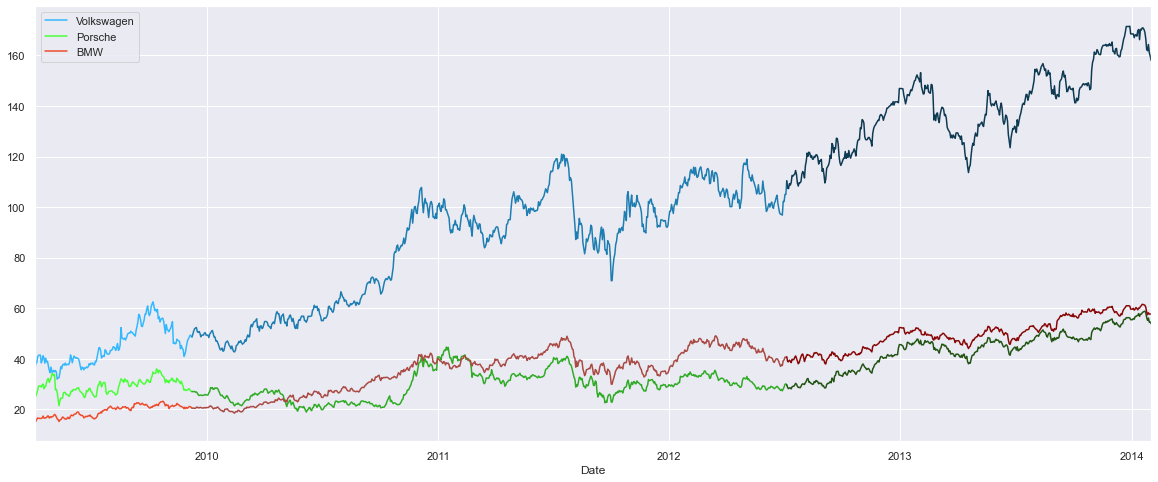

In [12]:
df['vol'][start_date:announc_1].plot(figsize= (20,8), color = "#33B8FF")
df['por'][start_date:announc_1].plot(color = "#49FF3A")
df['bmw'][start_date:announc_1].plot(color = "#EE4B2B")

df['vol'][announc_1:announc_2].plot(color = "#1E7EB2")
df['por'][announc_1:announc_2].plot(color = "#2FAB25")
df['bmw'][announc_1:announc_2].plot(color = "#AA4A44")

df['vol'][announc_2:end_date].plot(color = "#0E3A52")
df['por'][announc_2:end_date].plot(color = "#225414")
df['bmw'][announc_2:end_date].plot(color = "#880808")

plt.legend(['Volkswagen','Porsche','BMW'])

plt.show()
          


In [13]:
#color = "#49FF3A"
#color = "#2FAB25"
#color = "#225414"green

#color = "#33B8FF"
#color = "#1E7EB2"
#color = "#0E3A52"  blue

#color = "#AA4A44" red
#color = "#880808"
#color = "#EE4B2B"

## Correlation

In [14]:
print("Correlation from " + str(start_date) + " to " + str(end_date))

print("Volkswagen and Porsche: " + str(df["vol"][start_date:end_date].corr(df["por"][start_date:end_date])))

print("Volkswagen and BMW: " + str(df["vol"][start_date:end_date].corr(df["bmw"][start_date:end_date])))

print("Porsche and BMW: " + str(df["por"][start_date:end_date].corr(df["bmw"][start_date:end_date])))

#Only between start and End Date

Correlation from 2009-04-05 to 2014-02-01
Volkswagen and Porsche: 0.8463549036455413
Volkswagen and BMW: 0.9810547469334119
Porsche and BMW: 0.8168478118853698


### Volkswagen acquired Porsche by the end of out end date yet the correlation between them is not much, as they should move at same or equal frequency

In [15]:
# Plotting correlation btwenn announcement 1 and announchment 2 dates:

print("Correlation from " + str(start_date) + " to " + str(announc_1))

print("Volkswagen and Porsche: " + str(df["vol"][start_date:announc_1].corr(df["por"][start_date:announc_1])))

print("Volkswagen and BMW: " + str(df["vol"][start_date:announc_1].corr(df["bmw"][start_date:announc_1])))

print("Porsche and BMW: " + str(df["por"][start_date:announc_1].corr(df["bmw"][start_date:announc_1])))


Correlation from 2009-04-05 to 2009-12-09
Volkswagen and Porsche: 0.6633584938028643
Volkswagen and BMW: 0.8427607685934132
Porsche and BMW: 0.6095038874807424


In [16]:
# Plotting correlation btwenn announcement 1 and announchment 2 dates:

print("Correlation from " + str(announc_1) + " to " + str(announc_2))

print("Volkswagen and Porsche: " + str(df["vol"][announc_1:announc_2].corr(df["por"][announc_1:announc_2])))

print("Volkswagen and BMW: " + str(df["vol"][announc_1:announc_2].corr(df["bmw"][announc_1:announc_2])))

print("Porsche and BMW: " + str(df["por"][announc_1:announc_2].corr(df["bmw"][announc_1:announc_2])))


#here we have increase in correlation as they start buying the stocks of porsche

#Volkswagen and BMW: 0.9795943032968655 : very high correlation

Correlation from 2009-12-09 to 2012-07-05
Volkswagen and Porsche: 0.7428268122265618
Volkswagen and BMW: 0.9795943034756533
Porsche and BMW: 0.7042723588479687


In [17]:
# Plotting correlation btwenn announcement 1 and announchment 2 dates:

print("Correlation from " + str(announc_2) + " to " + str(end_date))

print("Volkswagen and Porsche: " + str(df["vol"][announc_2:end_date].corr(df["por"][announc_2:end_date])))

print("Volkswagen and BMW: " + str(df["vol"][announc_2:end_date].corr(df["bmw"][announc_2:end_date])))

print("Porsche and BMW: " + str(df["por"][announc_2:end_date].corr(df["bmw"][announc_2:end_date])))


#All have a higher correlation
#Porsche and BMW: 0.9557272449080074 - BMW is the market trendsetter

Correlation from 2012-07-05 to 2014-02-01
Volkswagen and Porsche: 0.9496215371872372
Volkswagen and BMW: 0.9375274528586167
Porsche and BMW: 0.9557272278356602


In [18]:
# After the described dates:
# Plotting correlation btwenn announcement 1 and announchment 2 dates:

print("Correlation from " + str(end_date) + " to " + str(df.index[-1]))

print("Volkswagen and Porsche: " + str(df["vol"][end_date:].corr(df["por"][end_date:])))

print("Volkswagen and BMW: " + str(df["vol"][end_date:].corr(df["bmw"][end_date:])))

print("Porsche and BMW: " + str(df["por"][end_date:].corr(df["bmw"][end_date:])))


# Volkswagen and Porsche: 0.9449147056160901 - Higehst correlation and others have the lowest 
# this happned due to dieselgate scandal


Correlation from 2014-02-01 to 2021-12-17 00:00:00
Volkswagen and Porsche: 0.9446678510662317
Volkswagen and BMW: 0.7071306893601583
Porsche and BMW: 0.7425298025848519


### After 2021-12-16 plot of graphs where Volkswagen was hit with the scandal

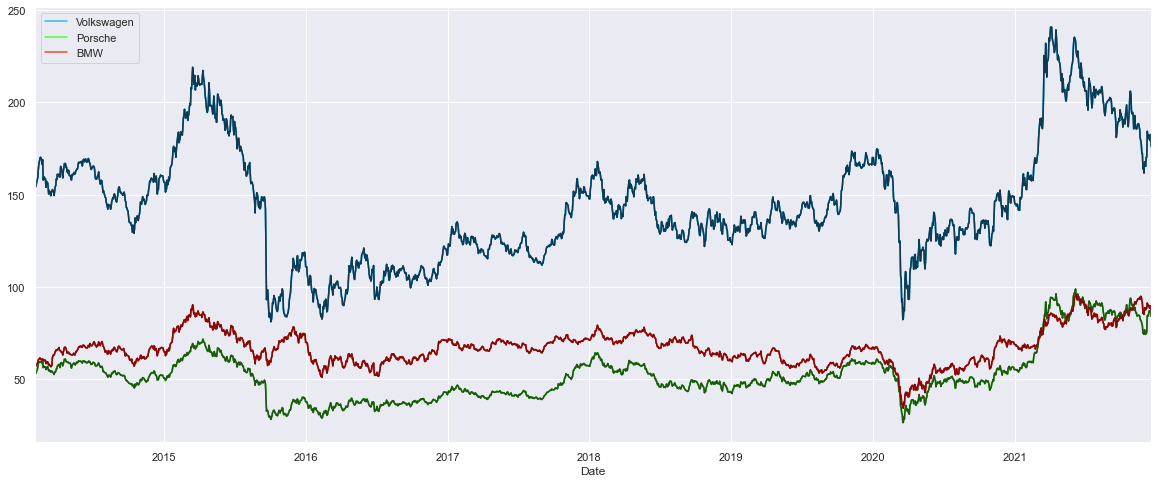

In [19]:
df['vol'][end_date:].plot(figsize= (20,8), color = "#33B8FF")
df['por'][end_date:].plot(color = "#49FF3A")
df['bmw'][end_date:].plot(color = "#EE4B2B")

df['vol'][end_date:].plot(color = "#1E7EB2")
df['por'][end_date:].plot(color = "#2FAB25")
df['bmw'][end_date:].plot(color = "#AA4A44")

df['vol'][end_date:].plot(color = "#0E3A52")
df['por'][end_date:].plot(color = "#225414")
df['bmw'][end_date:].plot(color = "#880808")

plt.legend(['Volkswagen','Porsche','BMW'])

plt.show()

## Best Fitting Models

### For Volkswagen

In [20]:
mod_pr_pre_vol = auto_arima(df.vol[start_date:announc_1], exogenous = df[['por','bmw']][start_date:announc_1],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_btn_vol = auto_arima(df.vol[announc_1:announc_2], exogenous = df[['por','bmw']][announc_1:announc_2],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_post_vol = auto_arima(df.vol[announc_2:end_date], exogenous = df[['por','bmw']][announc_2:end_date],
                            m = 5, max_p = 5, max_q = 5)

In [21]:
mod_pr_pre_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -322.988
Date:                Sun, 19 Dec 2021   AIC                            655.976
Time:                        19:42:16   BIC                            671.885
Sample:                    04-06-2009   HQIC                           662.427
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7232      0.447      1.618      0.106      -0.153       1.599
por            0.4000      0.096      4.168      0.000       0.212       0.588
bmw            0.6919      0.328      2.107      0.035       0.048       1.335
ar.L1          0.9633      0.020     48.670      0.000       0.925       1.002
sigma2         2.1737      0.148     14.718      0.000       1.884       2.463
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):               166.03
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                            -0.52
Prob(H) (two-sided):                  0.07   Kurtosis:                         7.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
mod_pr_btn_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1080.051
Date:                Sun, 19 Dec 2021   AIC                           2166.102
Time:                        19:42:16   BIC                           2179.629
Sample:                    12-09-2009   HQIC                          2171.341
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            0.7908      0.062     12.842      0.000       0.670       0.912
bmw            1.5487      0.073     21.269      0.000       1.406       1.691
sigma2         1.4643      0.060     24.532      0.000       1.347       1.581
===================================================================================
Ljung-Box (L1) (Q):                   2.07   Jarque-Bera (JB):               112.42
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
mod_pr_post_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  412
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -643.189
Date:                Sun, 19 Dec 2021   AIC                           1292.379
Time:                        19:42:16   BIC                           1304.435
Sample:                    07-05-2012   HQIC                          1297.148
                         - 01-31-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            1.7288      0.056     30.684      0.000       1.618       1.839
bmw            0.8254      0.091      9.112      0.000       0.648       1.003
sigma2         1.3391      0.065     20.596      0.000       1.212       1.467
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                89.79
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.31
Prob(H) (two-sided):                  0.34   Kurtosis:                         5.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### For Porsche

In [24]:
mod_pr_pre_por = auto_arima(df.por[start_date:announc_1],exogenous= df[["vol","bmw"]][start_date:announc_1],
                            max_p=5,max_q=5,m=5)
mod_pr_btn_por = auto_arima(df.por[announc_1:announc_2],exogenous= df[["vol","bmw"]][announc_1:announc_2],
                            max_p=5,max_q=5,m=5)
mod_pr_post_por = auto_arima(df.por[announc_2:end_date],exogenous= df[["vol","bmw"]][announc_2:end_date],
                            max_p=5,max_q=5,m=5)

In [25]:
mod_pr_pre_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -225.800
Date:                Sun, 19 Dec 2021   AIC                            463.601
Time:                        19:42:34   BIC                            482.692
Sample:                    04-06-2009   HQIC                           471.343
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5755      0.375      1.533      0.125      -0.160       1.311
vol            0.1150      0.053      2.157      0.031       0.011       0.219
bmw            0.8819      0.159      5.558      0.000       0.571       1.193
ar.L1          1.0748      0.059     18.194      0.000       0.959       1.191
ar.L2         -0.1589      0.059     -2.716      0.007      -0.274      -0.044
sigma2         0.7319      0.052     14.098      0.000       0.630       0.834
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               559.40
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                            -0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
mod_pr_btn_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -580.933
Date:                Sun, 19 Dec 2021   AIC                           1171.866
Time:                        19:42:34   BIC                           1194.410
Sample:                    12-09-2009   HQIC                          1180.598
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vol            0.1785      0.016     11.134      0.000       0.147       0.210
bmw            0.3317      0.046      7.200      0.000       0.241       0.422
ar.L1          0.6584      0.230      2.859      0.004       0.207       1.110
ma.L1         -0.5897      0.246     -2.393      0.017      -1.073      -0.107
sigma2         0.3308      0.010     32.415      0.000       0.311       0.351
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1076.52
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
mod_pr_post_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  412
Model:             SARIMAX(1, 1, 0)x(0, 0, [1], 5)   Log Likelihood                -220.159
Date:                             Sun, 19 Dec 2021   AIC                            450.318
Time:                                     19:42:34   BIC                            470.411
Sample:                                 07-05-2012   HQIC                           458.267
                                      - 01-31-2014                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vol            0.2220      0.013     17.117      0.000       0.197       0.247
bmw            0.2642      0.040      6.572      0.000       0.185       0.343
ar.L1         -0.0711      0.053     -1.332      0.183      -0.176       0.033
ma.S.L5       -0.1332      0.055     -2.417      0.016      -0.241      -0.025
sigma2         0.1709      0.006     27.990      0.000       0.159       0.183
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               582.16
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions for the Future

### For Porsche

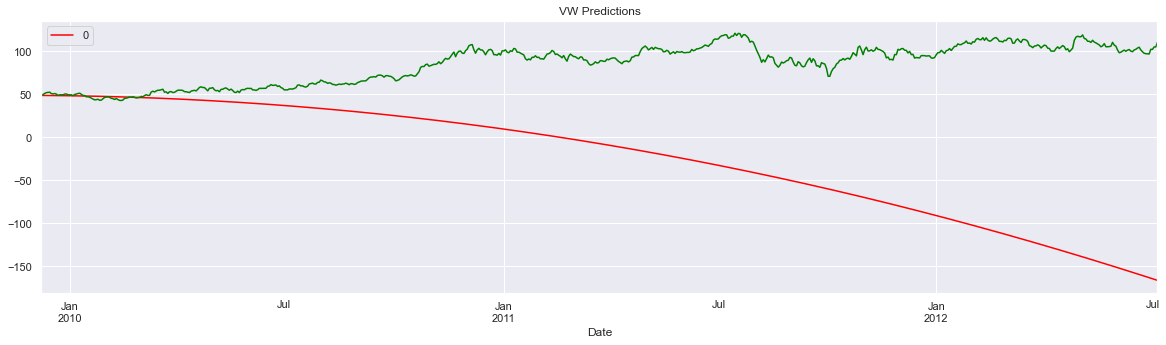

In [28]:
#Using best fitting models and forecasting them

#Using only vol
model_auto_pred_pr = auto_arima(df.vol[start_date:announc_1],m = 5,max_p=5,max_q=5,max_P=5,max_Q=5,
                                trend="ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[announc_1:announc_2])),
                               index=df[announc_1:announc_2].index)

df_auto_pred_pr[announc_1:announc_2].plot(figsize = (20,5),color = "red")

df.vol[announc_1:announc_2].plot(color = "green")
plt.title("VW Predictions")
plt.show()

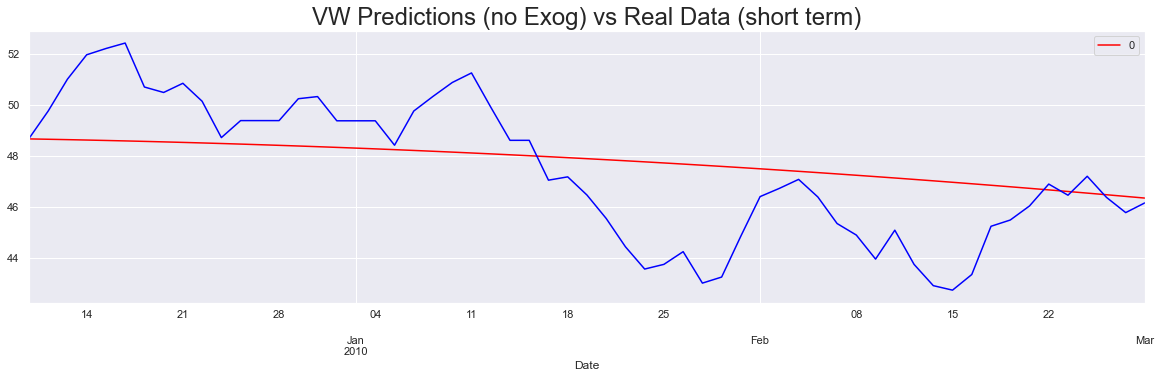

In [29]:
df_auto_pred_pr[announc_1:'2010-03-01'].plot(figsize = (20,5), color = "red")
df.vol[announc_1:'2010-03-01'].plot(color = "blue")
plt.title("VW Predictions (no Exog) vs Real Data (short term)", size = 24)
plt.show()

### For Volkswagen using exog

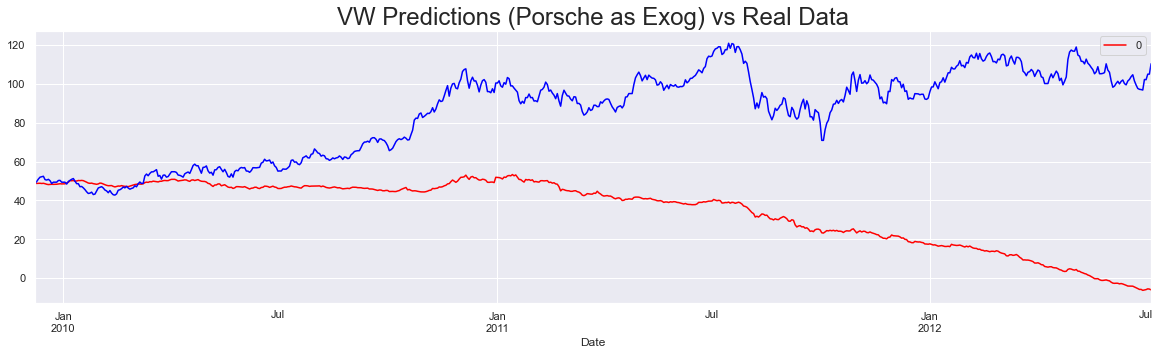

In [30]:
#Using only vol
model_auto_pred_pr = auto_arima(df.vol[start_date:announc_1], exogenous = df[['por']][start_date:announc_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[announc_1:announc_2]),exogenous = df[['por']][announc_1:announc_2]),
                               index = df[announc_1:announc_2].index)
df_auto_pred_pr[announc_1:announc_2].plot(figsize = (20,5), color = "red")

df.vol[announc_1:announc_2].plot(color = "blue")
plt.title("VW Predictions (Porsche as Exog) vs Real Data", size = 24)
plt.show()

### Using both as Exog variables - BMW and Porsche

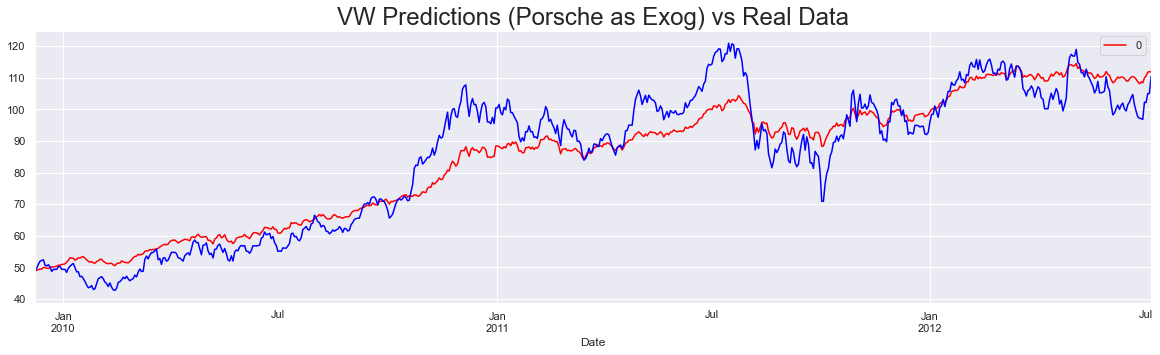

In [31]:
#Using only vol
model_auto_pred_pr_1 = auto_arima(df.vol[start_date:announc_1], exogenous = df[['por',"bmw"]][start_date:announc_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr_1 = pd.DataFrame(model_auto_pred_pr_1.predict(n_periods = len(df[announc_1:announc_2]),exogenous = df[['por',"bmw"]][announc_1:announc_2]),
                               index = df[announc_1:announc_2].index)
df_auto_pred_pr_1[announc_1:announc_2].plot(figsize = (20,5), color = "red")

df.vol[announc_1:announc_2].plot(color = "blue")
plt.title("VW Predictions (Porsche as Exog) vs Real Data", size = 24)
plt.show()



#this as some over and underestimations - but it predicts it with much better accuracy

## Volatility

### Volatility of VW for Each Period

<AxesSubplot:xlabel='Date'>

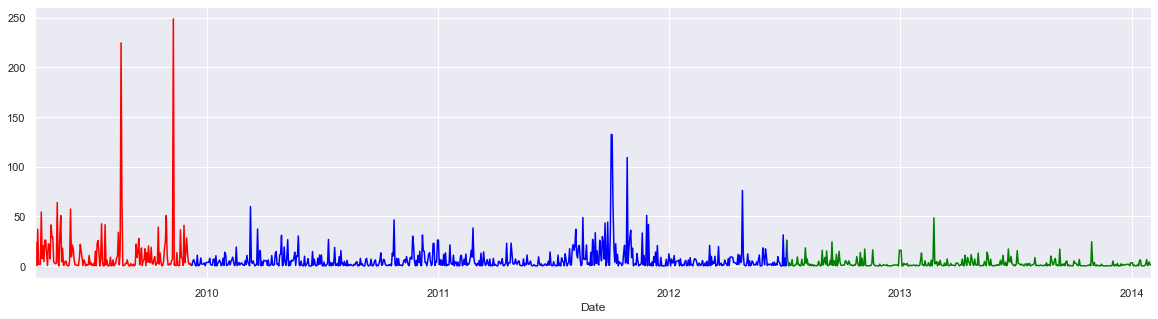

In [32]:
df.vol_sq[start_date:announc_1].plot(figsize = (20,5),color = "red")
df.vol_sq[announc_1:announc_2].plot(color = "blue")
df.vol_sq[announc_2:end_date].plot(color = "green")

### Volatility Trends for Each Period

In [33]:
model_garch_pre = arch_model(df.vol_returns[start_date:announc_1],mean="Constant",vol="GARCH",p = 1,q = 1)
result_garch_pre = model_garch_pre.fit(update_freq=6)


model_garch_mid = arch_model(df.vol_returns[announc_1:announc_2],mean="Constant",vol="GARCH",p = 1,q = 1)
result_garch_mid = model_garch_mid.fit(update_freq=6)

model_garch_end = arch_model(df.vol_returns[announc_2:end_date],mean="Constant",vol="GARCH",p = 1,q = 1)
result_garch_end = model_garch_end.fit(update_freq=6)


Iteration:      6,   Func. Count:     36,   Neg. LLF: 475.58157619899384
Iteration:     12,   Func. Count:     66,   Neg. LLF: 474.9905325854821
Optimization terminated successfully    (Exit mode 0)
            Current function value: 474.9904309742774
            Iterations: 15
            Function evaluations: 80
            Gradient evaluations: 15
Iteration:      6,   Func. Count:     43,   Neg. LLF: 1526.7333599151311
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1526.7319260323104
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      6,   Func. Count:     40,   Neg. LLF: 762.7191722546837
Optimization terminated successfully    (Exit mode 0)
            Current function value: 762.7191722546837
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7


In [34]:
result_garch_pre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:            vol_returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -474.990
Distribution:                  Normal   AIC:                           957.981
Method:            Maximum Likelihood   BIC:                           970.708
                                        No. Observations:                  178
Date:                Sun, Dec 19 2021   Df Residuals:                      177
Time:                        19:42:41   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1570      0.266      0.589      0.556 [ -0.365,  0.679]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         10.6197      4.227      2.512  1.200e-02    [  2.334, 18.905]
alpha[1]       0.1540  9.194e-02      1.675  9.400e-02 [-2.623e-02,  0.334]
beta[1]    1.2197e-12      0.349  3.493e-12      1.000    [ -0.684,  0.684]
===========================================================================

Covariance estimator: robust
"""

In [35]:
result_garch_mid.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:            vol_returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1526.73
Distribution:                  Normal   AIC:                           3061.46
Method:            Maximum Likelihood   BIC:                           3079.50
                                        No. Observations:                  672
Date:                Sun, Dec 19 2021   Df Residuals:                      671
Time:                        19:42:41   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1892  8.634e-02      2.191  2.843e-02 [1.998e-02,  0.358]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1679  7.914e-02      2.122  3.388e-02 [1.279e-02,  0.323]
alpha[1]       0.0688  1.682e-02      4.091  4.301e-05 [3.585e-02,  0.102]
beta[1]        0.9040  2.108e-02     42.883      0.000   [  0.863,  0.945]
==========================================================================

Covariance estimator: robust
"""

In [36]:
result_garch_end.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:            vol_returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -762.719
Distribution:                  Normal   AIC:                           1533.44
Method:            Maximum Likelihood   BIC:                           1549.52
                                        No. Observations:                  412
Date:                Sun, Dec 19 2021   Df Residuals:                      411
Time:                        19:42:41   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1932  9.912e-02      1.949  5.125e-02 [-1.045e-03,  0.388]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.8324      0.811      1.026      0.305 [ -0.758,  2.423]
alpha[1]       0.1742      0.148      1.179      0.238 [ -0.115,  0.464]
beta[1]        0.4919      0.405      1.214      0.225 [ -0.302,  1.286]
========================================================================

Covariance estimator: robust
"""

## Analyze the Diesel gate scandal:

In [41]:
# Dieselgate - Scandal
d_gate = "2015-09-20"
d_gate_end = "2020-09-20"

date_predict = "2021-12-17"
#Sept 20th

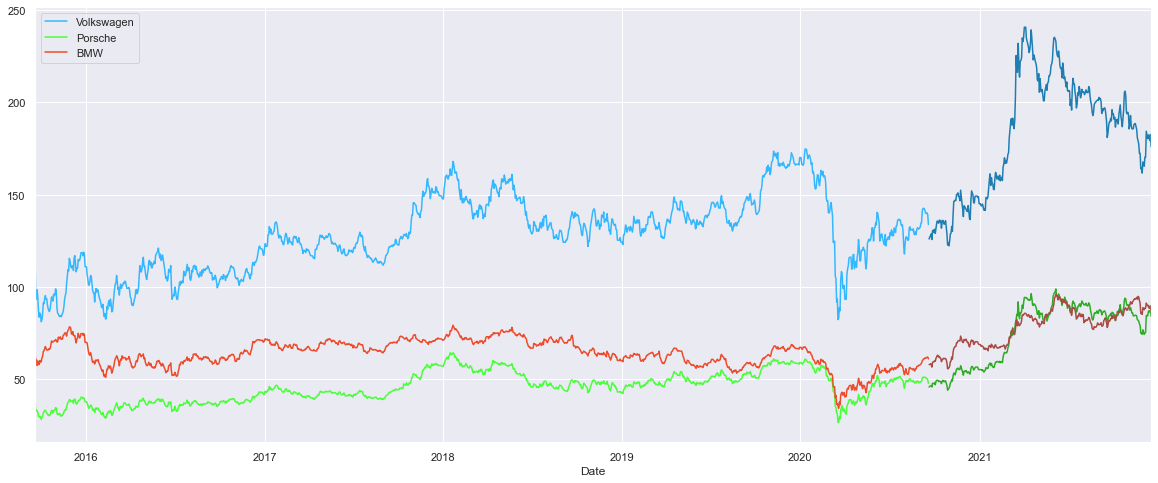

In [42]:
df['vol'][d_gate:d_gate_end].plot(figsize= (20,8), color = "#33B8FF")
df['por'][d_gate:d_gate_end].plot(color = "#49FF3A")
df['bmw'][d_gate:d_gate_end].plot(color = "#EE4B2B")

df['vol'][d_gate_end:date_predict].plot(color = "#1E7EB2")
df['por'][d_gate_end:date_predict].plot(color = "#2FAB25")
df['bmw'][d_gate_end:date_predict].plot(color = "#AA4A44")

plt.legend(['Volkswagen','Porsche','BMW'])

plt.show()

In [43]:
print("Correlation from " + str(d_gate) + " to " + str(d_gate_end))

print("Volkswagen and Porsche: " + str(df["vol"][d_gate:d_gate_end].corr(df["por"][d_gate:d_gate_end])))

print("Volkswagen and BMW: " + str(df["vol"][d_gate:d_gate_end].corr(df["bmw"][d_gate:d_gate_end])))

print("Porsche and BMW: " + str(df["por"][d_gate:d_gate_end].corr(df["bmw"][d_gate:d_gate_end])))

Correlation from 2015-09-20 to 2020-09-20
Volkswagen and Porsche: 0.9774560685131081
Volkswagen and BMW: 0.32901972457169143
Porsche and BMW: 0.3539819365116703


### Volkswagen and Porsche: 0.9774560685131081 - considering Volkswagen brought Porsche

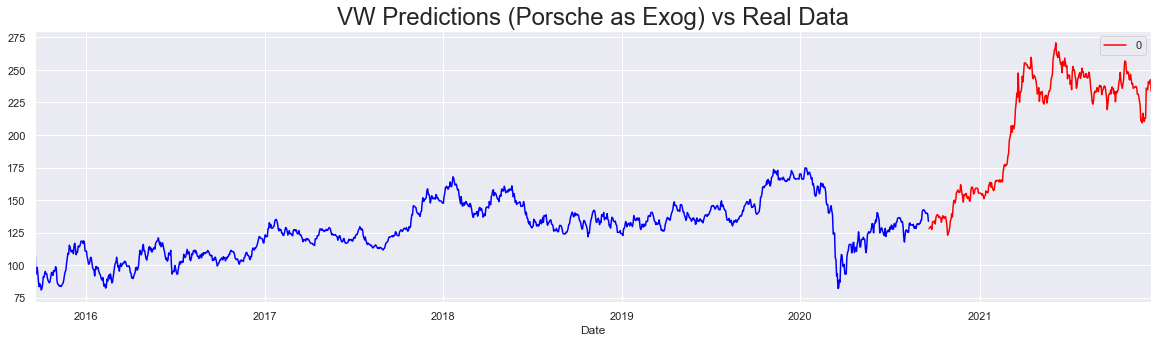

In [45]:
#Using only vol
model_auto_pred_pr = auto_arima(df.vol[d_gate:d_gate_end], exogenous = df[['por',"bmw"]][d_gate:d_gate_end],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[d_gate_end:date_predict]),exogenous = df[['por',"bmw"]][d_gate_end:date_predict]),
                               index = df[d_gate_end:date_predict].index)
df_auto_pred_pr[d_gate_end:date_predict].plot(figsize = (20,5), color = "red")

df.vol[d_gate:d_gate_end].plot(color = "blue")
plt.title("VW Predictions (Porsche as Exog) vs Real Data", size = 24)
plt.show()

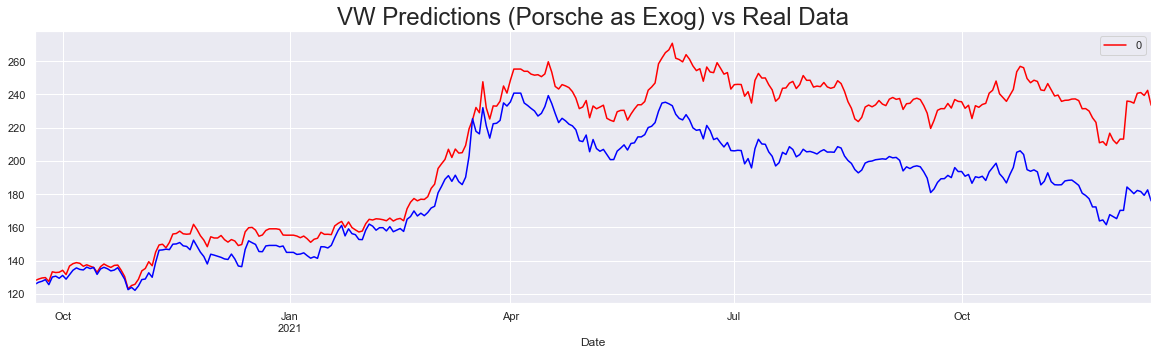

In [48]:
#Using only vol
model_auto_pred_pr_1 = auto_arima(df.vol[d_gate:d_gate_end], exogenous = df[['por',"bmw"]][d_gate:d_gate_end],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr_1 = pd.DataFrame(model_auto_pred_pr_1.predict(n_periods = len(df[d_gate_end:date_predict]),exogenous = df[['por',"bmw"]][d_gate_end:date_predict]),
                               index = df[d_gate_end:date_predict].index)
df_auto_pred_pr_1[d_gate_end:date_predict].plot(figsize = (20,5), color = "red")

df.vol[d_gate_end:date_predict].plot(color = "blue")
plt.title("VW Predictions (Porsche as Exog) vs Real Data", size = 24)
plt.show()


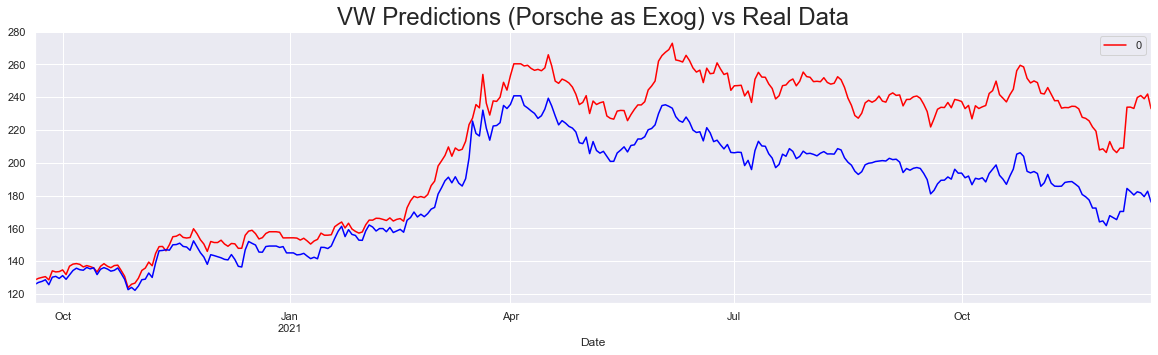

In [51]:
model_auto_pred_pr_12 = auto_arima(df.vol[d_gate:d_gate_end], exogenous = df[['por']][d_gate:d_gate_end],
                          m = 5, max_p = 4, max_q = 4, max_P = 4, max_Q = 4, trend = "ct")

df_auto_pred_pr_12 = pd.DataFrame(model_auto_pred_pr_12.predict(n_periods = len(df[d_gate_end:date_predict]),exogenous = df[['por']][d_gate_end:date_predict]),
                               index = df[d_gate_end:date_predict].index)
df_auto_pred_pr_12[d_gate_end:date_predict].plot(figsize = (20,5), color = "red")

df.vol[d_gate_end:date_predict].plot(color = "blue")
plt.title("VW Predictions (Porsche as Exog) vs Real Data", size = 24)
plt.show()


<AxesSubplot:xlabel='Date'>

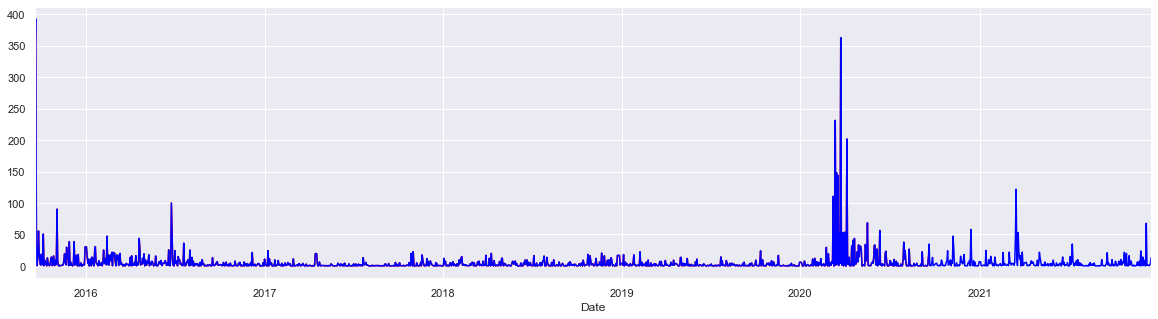

In [53]:
df.vol_sq[d_gate:d_gate_end].plot(figsize = (20,5),color = "red")
df.vol_sq[d_gate:date_predict].plot(color = "blue")